# Dummy System Interaction


In [1]:
import dummy_transformer


## Step 0: Process Model and Event Log

<span style="color:red">Please be aware: This step is designed solely to familiarise you with the process and is not considered a component of the actual model.</span>


We're analysing a renting process. Below is a BPMN representation of the process:

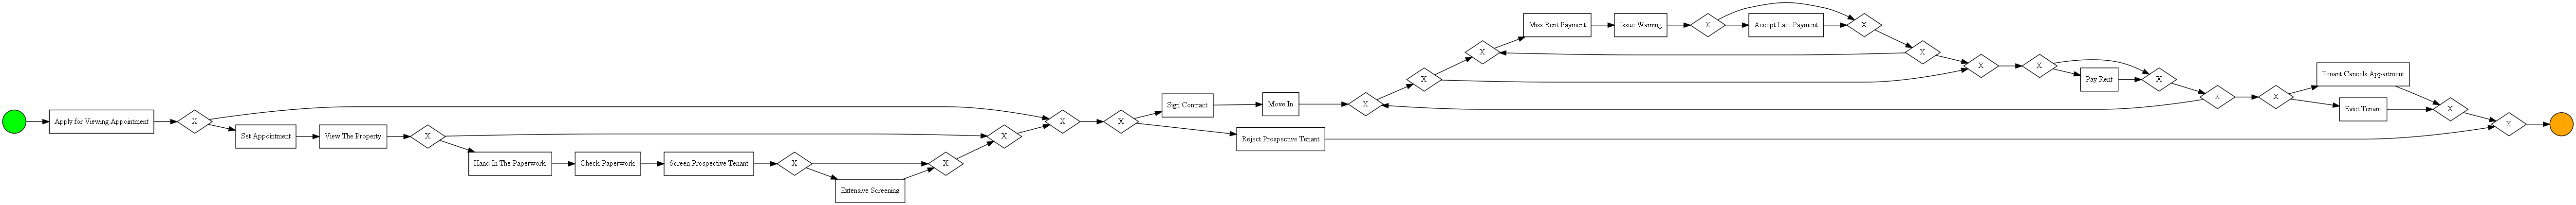

The layout of the event log is outlined below, showcasing an excerpt of the first ten rows:

| activity                      | resource            | time                      | concept:name                  | time:timestamp            |   @@index |   case:concept:name | case:german speaking   |   case:yearsOfEducation |   case:age | case:gender   | case:citizen   | case:protected   | case:married   |   case:@@case_index |   case:case |
|:------------------------------|:--------------------|:--------------------------|:------------------------------|:--------------------------|----------:|--------------------:|:-----------------------|------------------------:|-----------:|:--------------|:---------------|:-----------------|:---------------|--------------------:|------------:|
| Apply for Viewing Appointment | Hotline             | 2015-01-05 00:00:42+00:00 | Apply for Viewing Appointment | 2015-01-05 00:00:42+00:00 |         0 |                   1 | False                  |                       8 |         25 | False         | False          | False            | True           |                   0 |           1 |
| Set Appointment               | Hotline             | 2015-01-05 22:13:57+00:00 | Set Appointment               | 2015-01-05 22:13:57+00:00 |         1 |                   1 | False                  |                       8 |         25 | False         | False          | False            | True           |                   0 |           1 |
| View The Property             | Real Estate Agent 5 | 2015-01-06 20:26:13+00:00 | View The Property             | 2015-01-06 20:26:13+00:00 |         2 |                   1 | False                  |                       8 |         25 | False         | False          | False            | True           |                   0 |           1 |
| Hand In The Paperwork         | Real Estate Agent 5 | 2015-01-07 18:38:04+00:00 | Hand In The Paperwork         | 2015-01-07 18:38:04+00:00 |         3 |                   1 | False                  |                       8 |         25 | False         | False          | False            | True           |                   0 |           1 |
| Check Paperwork               | Lawyer 2            | 2015-01-08 08:31:34+00:00 | Check Paperwork               | 2015-01-08 08:31:34+00:00 |         4 |                   1 | False                  |                       8 |         25 | False         | False          | False            | True           |                   0 |           1 |
| Screen Prospective Tenant     | Real Estate Agent 1 | 2015-01-08 16:51:54+00:00 | Screen Prospective Tenant     | 2015-01-08 16:51:54+00:00 |         5 |                   1 | False                  |                       8 |         25 | False         | False          | False            | True           |                   0 |           1 |
| Sign Contract                 | Real Estate Agent 2 | 2015-01-09 15:06:16+00:00 | Sign Contract                 | 2015-01-09 15:06:16+00:00 |         6 |                   1 | False                  |                       8 |         25 | False         | False          | False            | True           |                   0 |           1 |
| Move In                       | Landlord 5          | 2015-01-10 13:19:19+00:00 | Move In                       | 2015-01-10 13:19:19+00:00 |         7 |                   1 | False                  |                       8 |         25 | False         | False          | False            | True           |                   0 |           1 |
| Pay Rent                      | Tenant              | 2015-01-11 11:31:57+00:00 | Pay Rent                      | 2015-01-11 11:31:57+00:00 |         8 |                   1 | False                  |                       8 |         25 | False         | False          | False            | True           |                   0 |           1 |
| Pay Rent                      | Tenant              | 2015-01-12 09:45:42+00:00 | Pay Rent                      | 2015-01-12 09:45:42+00:00 |         9 |                   1 | False                  |                       8 |         25 | False         | False          | False            | True           |                   0 |           1 |


<span style="color:red">Please be aware that six different models are possible based on your input. The following steps are designed to assist you in selecting the desired configuration.</span>


## Step 1: Set up the Transformer for Training


You can choose between selecting Activity and Timestamp (already preselected, so no additional input required) or opting for Activity, Timestamp, and Resource as Transformer input.

<span style="color:red">Please be aware: In fact, there are even more possible combinations in reality. The options given here lead to the creation of two distinct models.</span>


In [2]:
dummy_transformer.transformer_input()


Do you want to use a specific response configuration file for model training? (yes/no): no

Configuration of model training
Enter the path to the file that contains the event log: logs/Hospital Billing - Event Log.xes
XES file successfully read.
Input attributes for the transformer: Activity, Timestamp


You can choose whether to offer your expert attributes or not.

<span style="color:red">Please be aware: The decision leads to the creation of two separate models.</span>


In [3]:
dummy_transformer.expert_input()


Expert attributes: No


If you've chosen to offer expert attributes, you can decide whether to provide expert insights on the Start Activity or the End Activity.

<span style="color:red">Please be aware that you can also choose the attribute "Directly Following" in reality. Additionally, you have the option to select multiple attributes simultaneously. The choices available here lead to the development of two distinct models.</span>


In [4]:
dummy_transformer.provide_expert_input()


No expert attributes provided.


At this stage, the Transformer will undergo training according to the chosen configuration.


<span style="color:red">Please note that there are 44 potential outcomes depending on your input. The following steps are crafted to guide you in selecting the desired configuration.</span>


## Step 2: Repair the Event Log Containing the Elusive Case


You can choose whether to include additional expert input or not.

<span style="color:red">Please be aware: The options lead to two different outcomes.</span>


In [5]:
dummy_transformer.add_expert_input()


Configuration of log repair
Do you want to predict the Case ID values using the event log that was used for training? (yes/no): no
Please ensure the new event log and its name match the process used during training.
Enter the path to the file that contains the event log: logs/elusive/Hospital Billing - Event Log.xes
XES file successfully read.
Data Loading
Please enter the minimum probability (in %) with which the Case ID must be determined in order for it to be accepted: 25
For 10.00% of the events, the Case ID has originally not been recorded.
Output 3
--------------------------------------------------------------------------------
Do you want to use the repaired log as the baseline for an additional repair? (yes/no): yes
Do you want to keep the probability threshold for the next repair? (yes/no): no

Expert attributes: No


If you've opted to provide additional expert knowledge but haven't done so yet, you can choose between Start Activity and End Activity.
If yes, you have the option to select between providing expert knowledge regarding the Start Activity or the End Activity (depending on previous input). Beware that theoretically it would be best to retrain the Transformer after adding expert input.

<span style="color:red">Please be aware: In fact, you have the option to choose the attribute "Directly Following" as well. Additionally, you can select multiple attributes simultaneously. It's important to note that theoretically, retraining the Transformer after incorporating expert input would be optimal. If you've already supplied expert knowledge during training, the corresponding counterpart is automatically selected. This choice results in two distinct outcomes.</span>


In [6]:
dummy_transformer.provide_added_expert_input()


No additional expert attributes provided.


If you've inputted expert attributes during training, you can choose to conduct a rule verification.

<span style="color:red">Please be aware that in practice, if you've incorporated expert attributes post-training, you retain the option mentioned. However, in this specific scenario, the decision is automatically made for rule verification. The choice results in two distinct outcomes.</span>


In [7]:
dummy_transformer.rule_check()


No expert attributes provided.


You can choose between setting the threshold determination probability for the Transformer at either 0 or 50.

<span style="color:red">Please be aware: In fact, you have the flexibility to choose any percentage as the threshold for the Transformer. The options presented here lead to two distinct outcomes.</span>


In [8]:
dummy_transformer.threshold()


Threshold value: 0.0
Output 21
--------------------------------------------------------------------------------
Do you want to use the repaired log as the baseline for an additional repair? (yes/no): no



<span style="color:red">Please note: In reality, the complete outcome is saved in both XES and CSV file formats.</span>
